# Import Relevant Libraries

In [1]:
# for data manipulation
import pandas as pd
# for mathematical computation
import numpy as np
# for plotting graph
import matplotlib.pyplot as plt
%matplotlib inline
# for data visualization
import seaborn as sns
sns.set()
# for ignoring any warnings
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
# load the data into dataframe
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [3]:
# checkpoint-1
train_1 = train.copy()
test_1 = test.copy()

# Understanding the Data

In [4]:
# first we will look the features which is contained in our train dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variable and 1 dependent variable.

In [5]:
# We will look features of test dataset
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in train and test dataset excet loan_status which is our target variable

In [6]:
# displaying information like datatype, memory usage of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We have mix datatype features like int, object,float in our dataset. Object represents categorical variables, int represents integer variables and float represents decimal values.


In [7]:
# Look the shape of the variable
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

We have 614 rows and 13 variables in our train data and 418 rows and 12 variables in test data.

# Univariate analysis

In [9]:
# univariate analysis is the simplest form of analysing data where we examine each variable individually
# For categorical features we will use frequency table or bar plot
# For numerical features we will ise probability density plot to look at the distribution table.
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

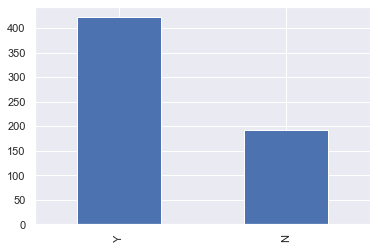

In [11]:
train['Loan_Status'].value_counts().plot.bar()

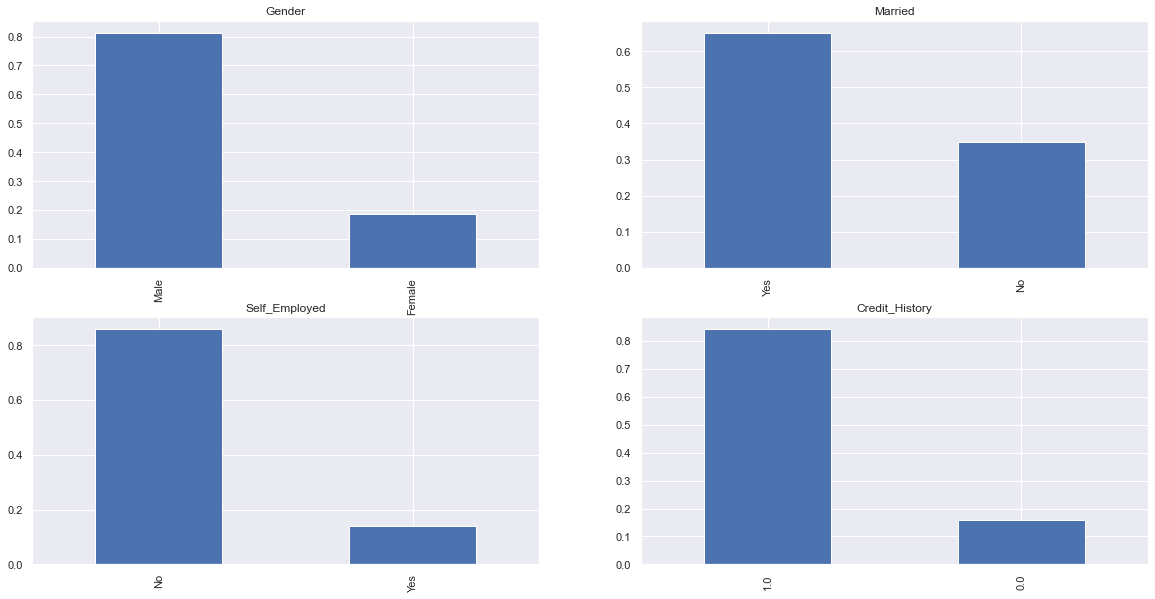

In [12]:
# categorical features = gender,married,self_employed,credit_gistory,loan_status
# ordinal features = dependents, education, property_area
# numerical features = ApplicantIncome, Loan_Amount,Loan_Amount_term,CoapplicantIncome
# Let's visualize the independent categorical features
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

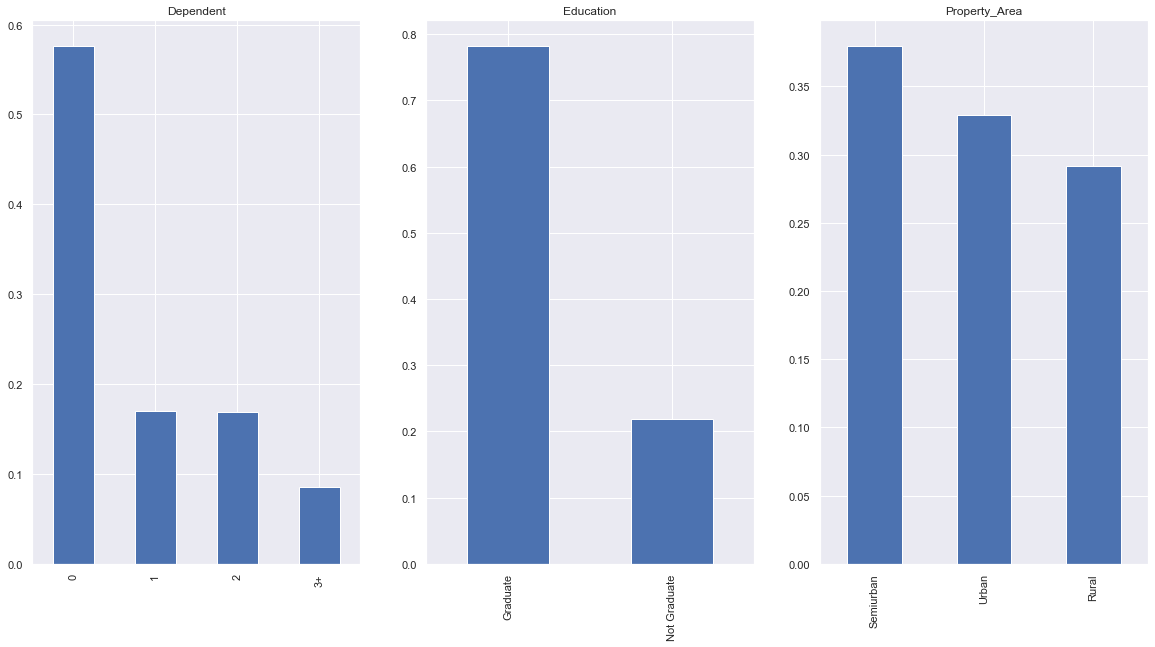

In [13]:
# Let's visualize the ordinal variable
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependent')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

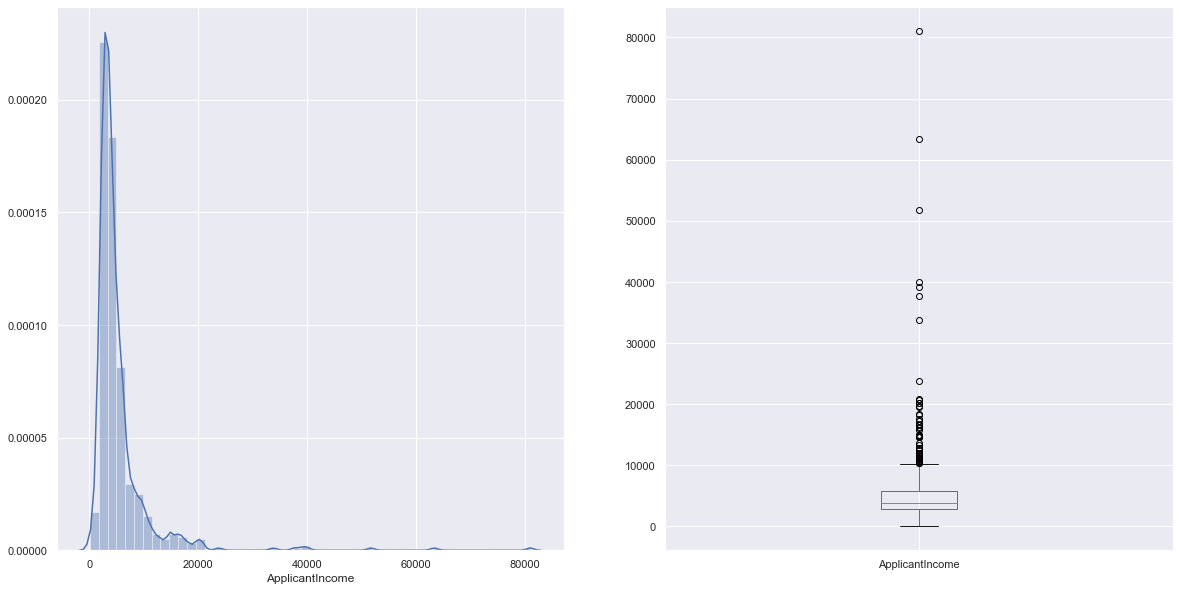

In [14]:
#Visualize numerical variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(20,10))
plt.show()

Text(0.5, 0.98, '')

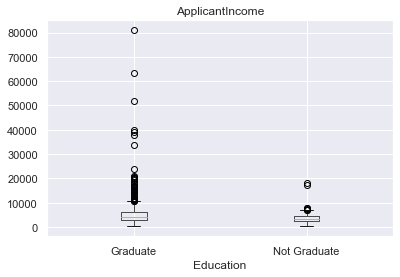

In [15]:
train.boxplot(column='ApplicantIncome',by='Education') 
plt.suptitle("")


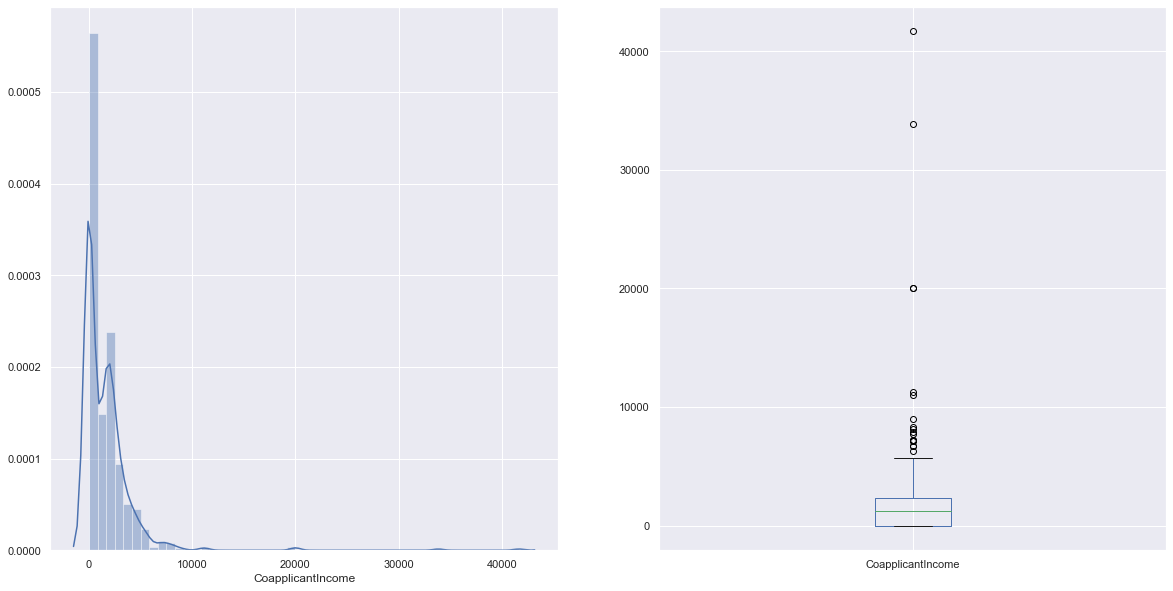

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(20,10))
plt.show()

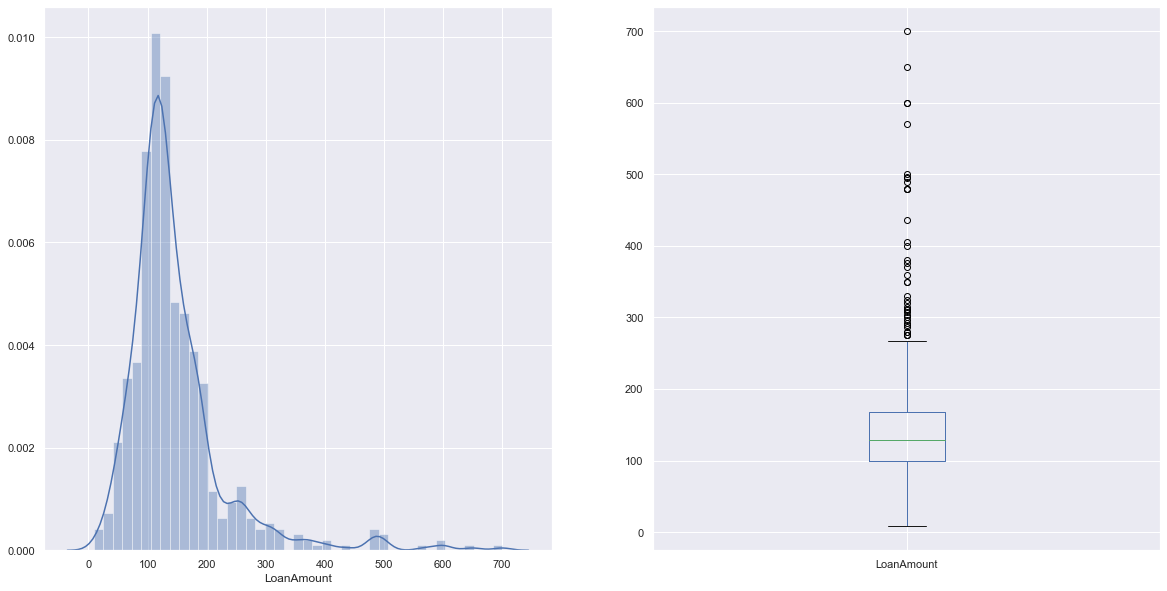

In [17]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(20,10))
plt.show()

# Bivariate Analysis

## Categorical  independent variable vs Target Variable

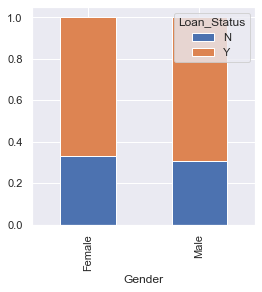

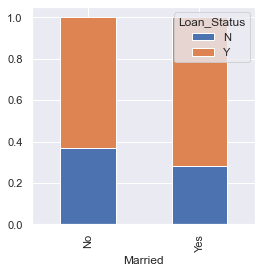

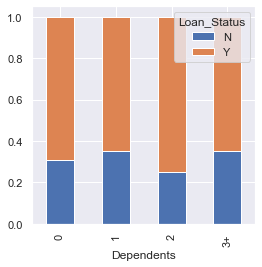

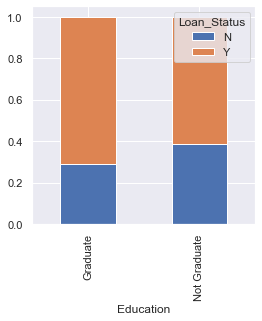

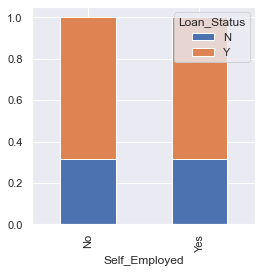

In [18]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

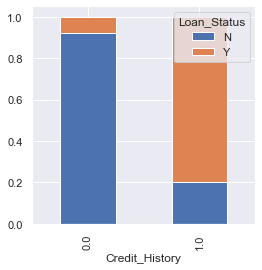

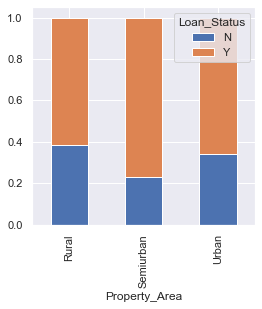

In [19]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

## Numerical Independent variable vs Target variable

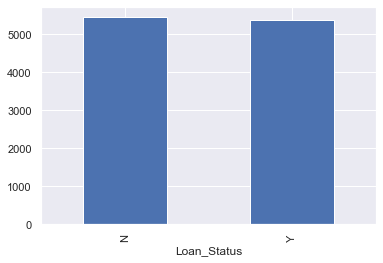

In [20]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

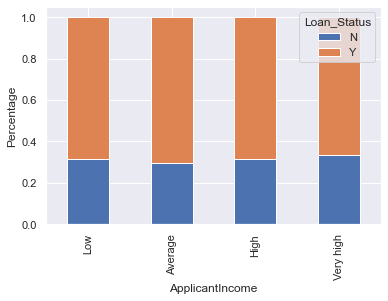

In [21]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

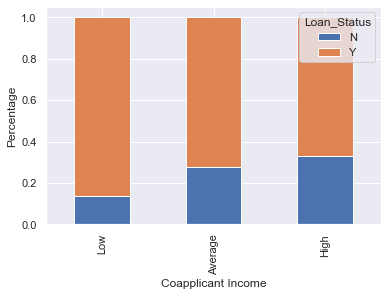

In [22]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Percentage')


Text(0, 0.5, 'Percentage')

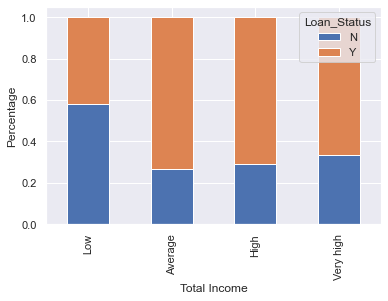

In [23]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,8100]
group = ['Low','Average','High','Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

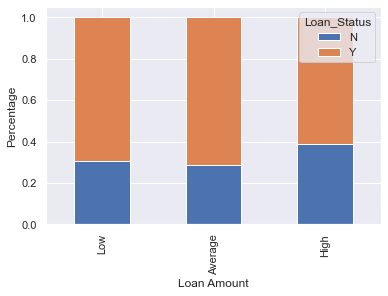

In [24]:
bins=[0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

In [25]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)


In [26]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+',3, inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)


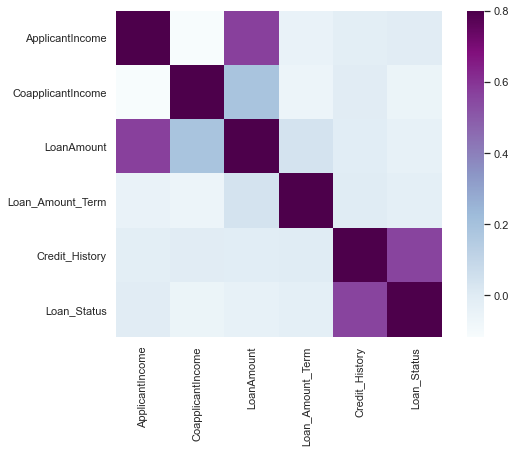

In [27]:
matrix = train.corr() 
ax= plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

# Missing Value and Outlier Treatment

In [28]:
# Lat's see the missing value 
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
# For numerical variable =Imputation using mean or median
# For categorical variable = Imputation using Mode
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [30]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [32]:
#We will impute missing value of loan amount with median due to presence of outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [33]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [35]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [36]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

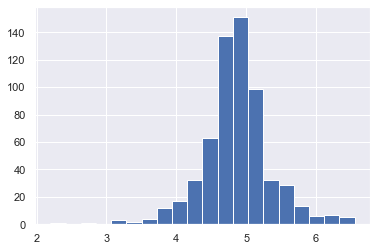

In [37]:
# Outlier treatment of loan amount variable
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

# Model Building

In [38]:
train = train.drop(['Loan_ID'],axis=1)
test = test.drop(['Loan_ID'],axis=1)

In [39]:
X = train.drop(['Loan_Status'], axis=1)
y = train['Loan_Status']

In [40]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [45]:
predict_cv = model.predict(x_cv)

In [46]:
accuracy_score(y_cv,predict_cv)

0.7675675675675676

In [47]:
pred_test = model.predict(test)

In [48]:
submission = pd.read_csv('sample_submission_49d68Cx.csv',index_col=False)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [49]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_1['Loan_ID']

In [50]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [51]:
#pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [52]:
from sklearn.model_selection import StratifiedKFold

In [53]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [54]:
i = 1
for train_index,test_index in kf.split(X,y):
    print('{} of kfold {}'.format(i,kf.n_splits))
    x_tr,x_val = X.loc[train_index], X.loc[test_index]
    y_tr,y_val = y.loc[train_index], y.loc[test_index]
    model_1 = LogisticRegression(random_state=1)
    model_1.fit(x_tr,y_tr)
    pred_test = model_1.predict(x_val)
    score = accuracy_score(y_val, pred_test)
    print('accuracy score:',score)
    i+=1
    pred_test = model_1.predict(test)
    pred = model_1.predict_proba(x_val)[:,1]

1 of kfold 5
accuracy score: 0.8048780487804879
2 of kfold 5
accuracy score: 0.8373983739837398
3 of kfold 5
accuracy score: 0.7804878048780488
4 of kfold 5
accuracy score: 0.7886178861788617
5 of kfold 5
accuracy score: 0.7950819672131147


In [55]:
from sklearn.metrics import roc_auc_score,roc_curve

In [56]:
fpr,tpr,_ = roc_curve(y_val, pred)

In [57]:
auc = roc_auc_score(y_val, pred)

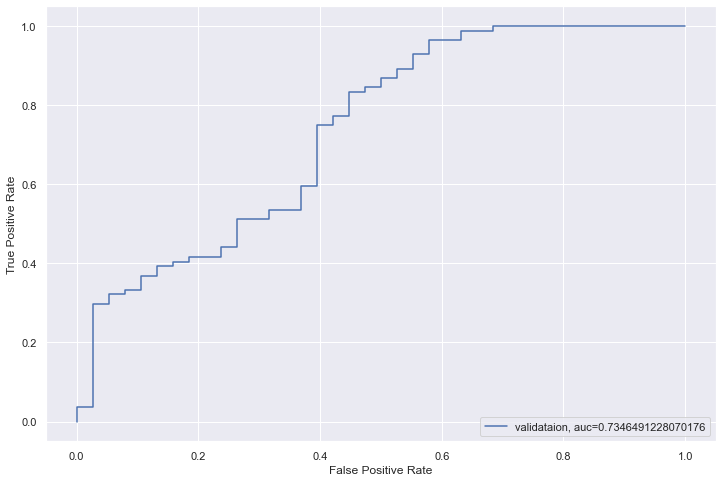

In [58]:
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validataion, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [59]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_1['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y', inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Logistic_1.csv')

# Feature Engineering

In [60]:
# Creating total_income variable
train['Total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

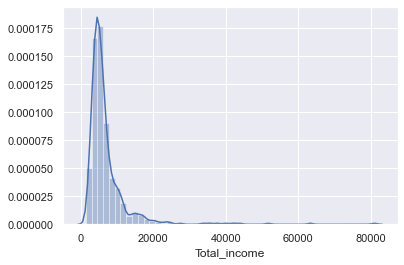

In [61]:
# Check the distribution of the total income
sns.distplot(train['Total_income'])

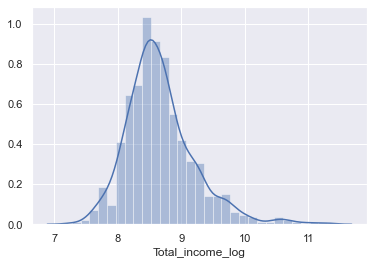

In [62]:
# Creating normal distributed Total income
train['Total_income_log'] = np.log(train['Total_income'])
sns.distplot(train['Total_income_log'])

In [63]:
test['Total_income_log'] = np.log(test['Total_income'])

In [64]:
# Creating EMI variable
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

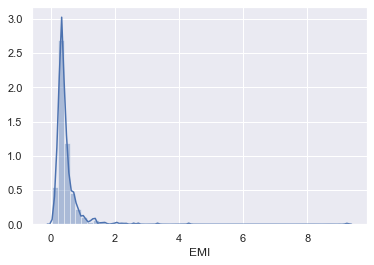

In [65]:
# Check the distribution of EMI
sns.distplot(train['EMI'])


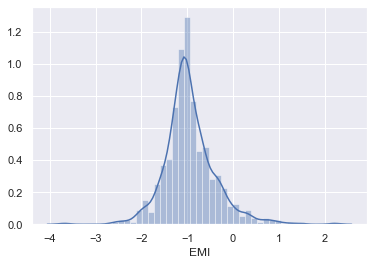

In [66]:
train['EMI'] = np.log(train['EMI'])
sns.distplot(train['EMI'])

In [67]:
test['EMI'] = np.log(test['EMI'])

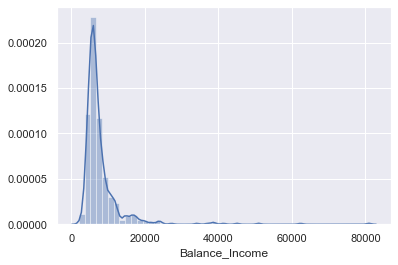

In [68]:
# Creating Balance Income variable
train['Balance_Income'] = train['Total_income'] - (train['EMI']*1000)
test['Balance_Income'] = test['Total_income'] - (test['EMI']*1000)
sns.distplot(train['Balance_Income'])

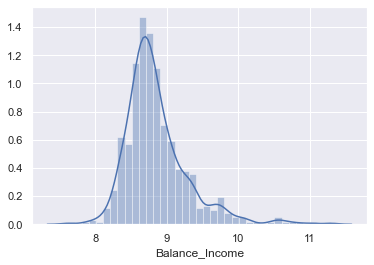

In [69]:
train['Balance_Income'] = np.log(train['Balance_Income'])
sns.distplot(train['Balance_Income'])

In [70]:
test['Balance_Income'] = np.log(test['Balance_Income'])

In [71]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [72]:
X = train.drop(['Loan_Status'],1)
y = train['Loan_Status']

In [73]:
# Logistic Regression
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('{} of kfold {}='.format(i,kf.n_splits))
    x_tr,x_val = X.loc[train_index], X.loc[test_index]
    y_tr,y_val = y.loc[train_index], y.loc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(x_tr, y_tr)
    pred_test = model.predict(x_val)
    score = accuracy_score(y_val,pred_test)
    print('accuracy score = ',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(x_val)[:,1]

1 of kfold 5=
accuracy score =  0.7967479674796748
2 of kfold 5=
accuracy score =  0.8373983739837398
3 of kfold 5=
accuracy score =  0.7804878048780488
4 of kfold 5=
accuracy score =  0.6829268292682927
5 of kfold 5=
accuracy score =  0.8032786885245902


In [74]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_1['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

# Decision tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('{} of kfold {}='.format(i,kf.n_splits))
    x_tr,x_val = X.loc[train_index], X.loc[test_index]
    y_tr,y_val = y.loc[train_index], y.loc[test_index]
    model = DecisionTreeClassifier(random_state=1)
    model.fit(x_tr, y_tr)
    pred_test = model.predict(x_val)
    score = accuracy_score(y_val,pred_test)
    print('accuracy score = ',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(x_val)[:,1]

1 of kfold 5=
accuracy score =  0.7073170731707317
2 of kfold 5=
accuracy score =  0.6991869918699187
3 of kfold 5=
accuracy score =  0.7154471544715447
4 of kfold 5=
accuracy score =  0.7154471544715447
5 of kfold 5=
accuracy score =  0.6639344262295082


In [77]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_1['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('decisiontree.csv')

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('{} of kfold {}='.format(i,kf.n_splits))
    x_tr,x_val = X.loc[train_index], X.loc[test_index]
    y_tr,y_val = y.loc[train_index], y.loc[test_index]
    model = RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(x_tr, y_tr)
    pred_test = model.predict(x_val)
    score = accuracy_score(y_val,pred_test)
    print('accuracy score = ',score)
    i+=1
    pred_test = model.predict(test)
    pred_2 = model.predict_proba(x_val)[:,1]

1 of kfold 5=
accuracy score =  0.8211382113821138
2 of kfold 5=
accuracy score =  0.8211382113821138
3 of kfold 5=
accuracy score =  0.8048780487804879
4 of kfold 5=
accuracy score =  0.7967479674796748
5 of kfold 5=
accuracy score =  0.7622950819672131


In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=1)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [84]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=141, random_state=1)

In [85]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('{} of kfold {}='.format(i,kf.n_splits))
    x_tr,x_val = X.loc[train_index], X.loc[test_index]
    y_tr,y_val = y.loc[train_index], y.loc[test_index]
    model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators=141)
    model.fit(x_tr, y_tr)
    pred_test = model.predict(x_val)
    score = accuracy_score(y_val,pred_test)
    print('accuracy score = ',score)
    i+=1
    pred_test = model.predict(test)
    pred_2 = model.predict_proba(x_val)[:,1]

1 of kfold 5=
accuracy score =  0.8130081300813008
2 of kfold 5=
accuracy score =  0.8211382113821138
3 of kfold 5=
accuracy score =  0.8048780487804879
4 of kfold 5=
accuracy score =  0.7886178861788617
5 of kfold 5=
accuracy score =  0.7950819672131147


In [86]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_1['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('randomforest.csv')

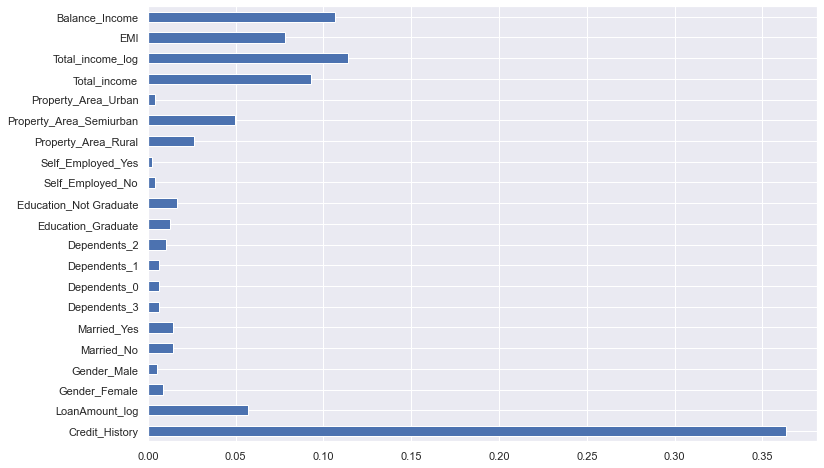

In [87]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [88]:
from xgboost import XGBClassifier

In [89]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('{} of kfold {}='.format(i,kf.n_splits))
    x_tr,x_val = X.loc[train_index], X.loc[test_index]
    y_tr,y_val = y.loc[train_index], y.loc[test_index]
    model = XGBClassifier(n_estimators=50,max_depth=4)
    model.fit(x_tr, y_tr)
    pred_test = model.predict(x_val)
    score = accuracy_score(y_val,pred_test)
    print('accuracy score = ',score)
    i+=1
    pred_test = model.predict(test)
    pred_3 = model.predict_proba(x_val)[:,1]

1 of kfold 5=
accuracy score =  0.7723577235772358
2 of kfold 5=
accuracy score =  0.7723577235772358
3 of kfold 5=
accuracy score =  0.7560975609756098
4 of kfold 5=
accuracy score =  0.7479674796747967
5 of kfold 5=
accuracy score =  0.7377049180327869


In [90]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_1['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('XGboost.csv')